In [2]:
# Loading all packages + ignoring warnings
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn import linear_model
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns
import requests
from datetime import datetime
import json
import matplotlib
import statsmodels.api as sm
from sklearn import datasets

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

True
-----
dict length: 140
-----
True
-----
dict length: 140
-----
True
-----
dict length: 140
-----
True
-----
dict length: 140
-----
True
-----
dict length: 140
-----
      0   1   2   3   4   5   6
0  2007  01  94  48  22  37  34
1  2007  02  85  35  22  28  33
2  2007  03  76  42  24  35  33
3  2007  04  75  31  17  32  28
4  2007  05  74  32  24  28  31
   Year Month  GI 'job'  GI 'dagpenge'  GI 'kontanthjælp'  GI 'a-kasse'  \
0  2007    01        94             48                 22            37   
1  2007    02        85             35                 22            28   
2  2007    03        76             42                 24            35   
3  2007    04        75             31                 17            32   
4  2007    05        74             32                 24            28   

   GI 'jobnet'  
0           34  
1           33  
2           33  
3           28  
4           31  
   Year Month  GI 'job'  GI 'dagpenge'  GI 'kontanthjælp'  GI 'a-kasse'  \
0  2007   

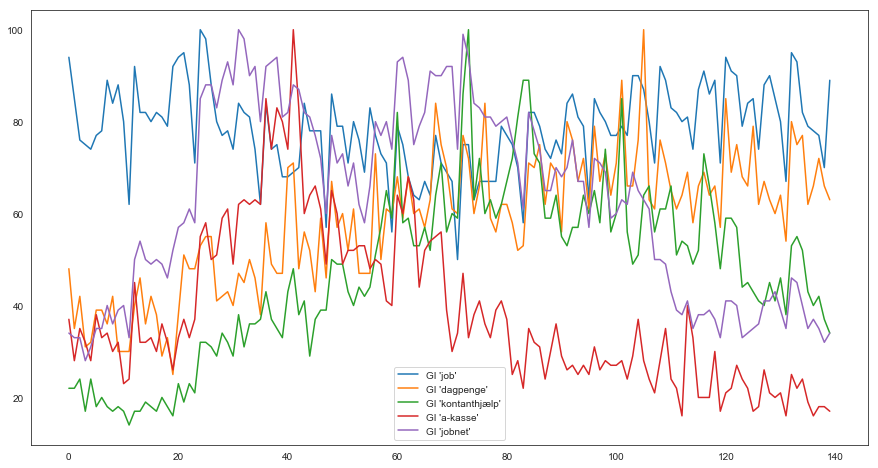

In [44]:
# Search for 'job' 2004-
#url = 'https://trends.google.dk/trends/api/widgetdata/multiline?hl=da&tz=-120&req=%7B%22time%22:%222004-01-01+2018-08-26%22,%22resolution%22:%22MONTH%22,%22locale%22:%22da%22,%22comparisonItem%22:%5B%7B%22geo%22:%7B%22country%22:%22DK%22%7D,%22complexKeywordsRestriction%22:%7B%22keyword%22:%5B%7B%22type%22:%22BROAD%22,%22value%22:%22job%22%7D%5D%7D%7D%5D,%22requestOptions%22:%7B%22property%22:%22%22,%22backend%22:%22IZG%22,%22category%22:0%7D%7D&token=APP6_UEAAAAAW4QYUBiTZJun1Tk9Ech73slURKjPDR2E&tz=-120'

# Search for 'job' 2007-
url_job = 'https://trends.google.dk/trends/api/widgetdata/multiline?hl=da&tz=-120&req=%7B%22time%22:%222007-01-01+2018-08-29%22,%22resolution%22:%22MONTH%22,%22locale%22:%22da%22,%22comparisonItem%22:%5B%7B%22geo%22:%7B%22country%22:%22DK%22%7D,%22complexKeywordsRestriction%22:%7B%22keyword%22:%5B%7B%22type%22:%22BROAD%22,%22value%22:%22job%22%7D%5D%7D%7D%5D,%22requestOptions%22:%7B%22property%22:%22%22,%22backend%22:%22IZG%22,%22category%22:0%7D%7D&token=APP6_UEAAAAAW4fe6-2dsET3xP7h1Y3OweS11kacFLhU&tz=-120'
url_dagpenge = 'https://trends.google.dk/trends/api/widgetdata/multiline?hl=da&tz=-120&req=%7B%22time%22:%222007-01-01+2018-08-29%22,%22resolution%22:%22MONTH%22,%22locale%22:%22da%22,%22comparisonItem%22:%5B%7B%22geo%22:%7B%22country%22:%22DK%22%7D,%22complexKeywordsRestriction%22:%7B%22keyword%22:%5B%7B%22type%22:%22BROAD%22,%22value%22:%22dagpenge%22%7D%5D%7D%7D%5D,%22requestOptions%22:%7B%22property%22:%22%22,%22backend%22:%22IZG%22,%22category%22:0%7D%7D&token=APP6_UEAAAAAW4ffDqYGsvDiXLzsbRtwEuGUVj_gICFU&tz=-120'
url_kontanthjælp = 'https://trends.google.dk/trends/api/widgetdata/multiline?hl=da&tz=-120&req=%7B%22time%22:%222007-01-01+2018-08-29%22,%22resolution%22:%22MONTH%22,%22locale%22:%22da%22,%22comparisonItem%22:%5B%7B%22geo%22:%7B%22country%22:%22DK%22%7D,%22complexKeywordsRestriction%22:%7B%22keyword%22:%5B%7B%22type%22:%22BROAD%22,%22value%22:%22kontanthj%C3%A6lp%22%7D%5D%7D%7D%5D,%22requestOptions%22:%7B%22property%22:%22%22,%22backend%22:%22IZG%22,%22category%22:0%7D%7D&token=APP6_UEAAAAAW4ffJ7sJM8lV9LeHcUdNOKX43WYeIRWn&tz=-120'
url_akasse = 'https://trends.google.dk/trends/api/widgetdata/multiline?hl=da&tz=-120&req=%7B%22time%22:%222007-01-01+2018-08-29%22,%22resolution%22:%22MONTH%22,%22locale%22:%22da%22,%22comparisonItem%22:%5B%7B%22geo%22:%7B%22country%22:%22DK%22%7D,%22complexKeywordsRestriction%22:%7B%22keyword%22:%5B%7B%22type%22:%22BROAD%22,%22value%22:%22a-kasse%22%7D%5D%7D%7D%5D,%22requestOptions%22:%7B%22property%22:%22%22,%22backend%22:%22IZG%22,%22category%22:0%7D%7D&token=APP6_UEAAAAAW4ffTdu5RMRJshD0S9n7rP1AvC-sah16&tz=-120'
url_jobnet = 'https://trends.google.dk/trends/api/widgetdata/multiline?hl=da&tz=-120&req=%7B%22time%22:%222007-01-01+2018-08-29%22,%22resolution%22:%22MONTH%22,%22locale%22:%22da%22,%22comparisonItem%22:%5B%7B%22geo%22:%7B%22country%22:%22DK%22%7D,%22complexKeywordsRestriction%22:%7B%22keyword%22:%5B%7B%22type%22:%22BROAD%22,%22value%22:%22jobnet%22%7D%5D%7D%7D%5D,%22requestOptions%22:%7B%22property%22:%22%22,%22backend%22:%22IZG%22,%22category%22:0%7D%7D&token=APP6_UEAAAAAW4ffsYDR_Of8TjMQhVk5wt0TMZzRgKuT&tz=-120'


# Blacklist
#url_arbejdsløs = 'https://trends.google.dk/trends/api/widgetdata/multiline?hl=da&tz=-120&req=%7B%22time%22:%222007-01-01+2018-08-28%22,%22resolution%22:%22MONTH%22,%22locale%22:%22da%22,%22comparisonItem%22:%5B%7B%22geo%22:%7B%22country%22:%22DK%22%7D,%22complexKeywordsRestriction%22:%7B%22keyword%22:%5B%7B%22type%22:%22BROAD%22,%22value%22:%22arbejdsl%C3%B8s%22%7D%5D%7D%7D%5D,%22requestOptions%22:%7B%22property%22:%22%22,%22backend%22:%22IZG%22,%22category%22:0%7D%7D&token=APP6_UEAAAAAW4aT9nXvFVzgx4l6U0RtVOEl_spRZ3J_&tz=-120'
#url_jobindex = 'https://trends.google.dk/trends/api/widgetdata/multiline?hl=da&tz=-120&req=%7B%22time%22:%222007-01-01+2018-08-28%22,%22resolution%22:%22MONTH%22,%22locale%22:%22da%22,%22comparisonItem%22:%5B%7B%22geo%22:%7B%22country%22:%22DK%22%7D,%22complexKeywordsRestriction%22:%7B%22keyword%22:%5B%7B%22type%22:%22BROAD%22,%22value%22:%22jobindex%22%7D%5D%7D%7D%5D,%22requestOptions%22:%7B%22property%22:%22%22,%22backend%22:%22IZG%22,%22category%22:0%7D%7D&token=APP6_UEAAAAAW4at229ZiMy59btGP0Mmnbl8mLSJz85a&tz=-120'


url_list = [url_job,
            url_dagpenge,
            url_kontanthjælp,
            url_akasse,
            url_jobnet
           ]

# Search for 'job' last 12 months
#url = 'https://trends.google.dk/trends/api/widgetdata/multiline?hl=da&tz=-120&req=%7B%22time%22:%222017-08-26+2018-08-26%22,%22resolution%22:%22WEEK%22,%22locale%22:%22da%22,%22comparisonItem%22:%5B%7B%22geo%22:%7B%22country%22:%22DK%22%7D,%22complexKeywordsRestriction%22:%7B%22keyword%22:%5B%7B%22type%22:%22BROAD%22,%22value%22:%22job%22%7D%5D%7D%7D%5D,%22requestOptions%22:%7B%22property%22:%22%22,%22backend%22:%22IZG%22,%22category%22:0%7D%7D&token=APP6_UEAAAAAW4QYrGUU6pWSo1zs0zJvLwLnU9iRellO&tz=-120'

combined_list = []

for j in url_list:
    response = requests.get(j)
    print(response.ok)

    print('-----')
    #print(response.text)
    dict_ = json.loads(response.text.split(")]}\',\n")[1])
    #print(dict)

    # saving length of the timelineData dict
    dict_length = len(dict_['default']['timelineData'])
    print('dict length: ' + str(dict_length)); print('-----')

    timelinedata_list = [] 

    for i in range(0,dict_length):
        # Extracting value (keyword: 'time')
        time = dict_['default']['timelineData'][i]['time']
    
        year = datetime.utcfromtimestamp(int(time)).strftime('%Y')
        month = datetime.utcfromtimestamp(int(time)).strftime('%m')
        # Extracting value (keyword: 'value'). Pulling out first element, since list with one element.
        value = dict_['default']['timelineData'][i]['value'][0]
    
    
        help_list =[]
        if j == url_list[0]:
            help_list.append(year)
            help_list.append(month)
        help_list.append(value)
        #print('help_list')
        #print(help_list)
        timelinedata_list.append(help_list)
        
    #df[j+2] = pd.DataFrame(timelinedata_list) #test_list.append(timelinedata_list)
    #print('timelinedata_list')
    #print(timelinedata_list[0:5])
    
    if j == url_list[0]:
        for l in range(0, len(timelinedata_list)):
            
            combined_list.append(timelinedata_list[l])
        #print('----combined_list first----')
        #print(combined_list)
    else:
        #print('---timelinedata_list----')
        #print(len(timelinedata_list))
        #print(timelinedata_list)
        #print('-----combined_list-----')
        #print(len(combined_list))
        #print(combined_list)
        #print('HER')
        for k in range(0,len(timelinedata_list)):
            combined_list[k].append(timelinedata_list[k][0])
        #print('---combined_list-----')
        #print(combined_list)
    
    #for k in timelinedata_list:
    #combined_list_copy = combined_list.copy()
    #combined_list = list(zip(combined_list_copy, timelinedata_list))

#print('----combined_list------')
#print(combined_list)
df = pd.DataFrame(combined_list)
print(df.head())
df.columns = ['Year', 'Month',
              "GI 'job'",
              "GI 'dagpenge'",
              "GI 'kontanthjælp'", 
              "GI 'a-kasse'",
              "GI 'jobnet'"
             ]
print(df.head())

df2 = df.groupby(['Year', 'Month'], as_index=False).mean()
print(df2.head())
print(len(df2))
df2.plot(figsize=(15,8))

##out = time.strftime("%a, %d %b %Y %H:%M:%S %Z", time.localtime(test))
##print(dict['default']['timelineData'][1]['time'])
##print(dict['default']['timelineData'][1]['value'])#.keys())

##print(datetime.utcfromtimestamp(test).strftime('%m'))





,GI 'job',GI 'dagpenge',GI 'kontanthjælp',GI 'a-kasse',GI 'jobnet',Date
0,94,48,22,37,34,2007-01-01
1,85,35,22,28,33,2007-02-01
2,76,42,24,35,33,2007-03-01


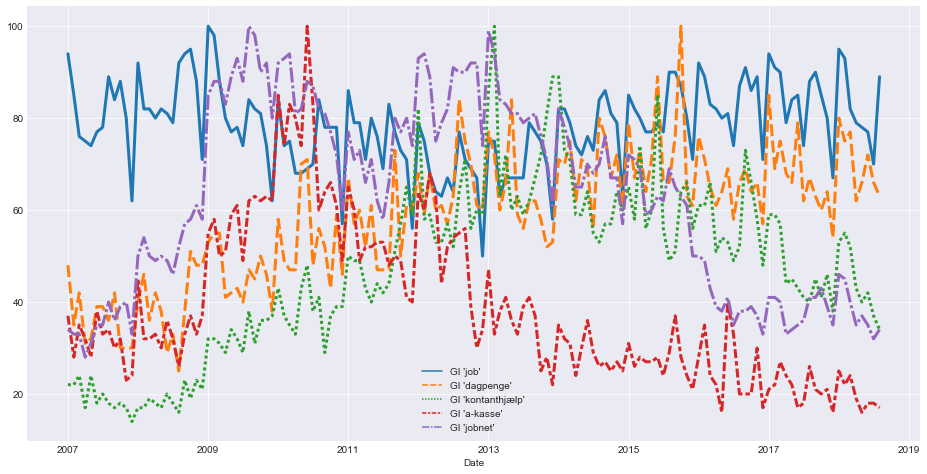

In [83]:
from matplotlib import pyplot

df2 = df2.assign(Date=pd.to_datetime(df2[['Year', 'Month']].assign(day=1)))
dfx = df2.drop(columns = ['Year', 'Month'])
dfx = dfx.set_index(['Date'], drop=True)

fig, ax = pyplot.subplots(figsize = (16, 8))
sns.set_style("white")
sns.lineplot(ax=ax, data = dfx, linewidth = 3, alpha = 1)
df.head(3)


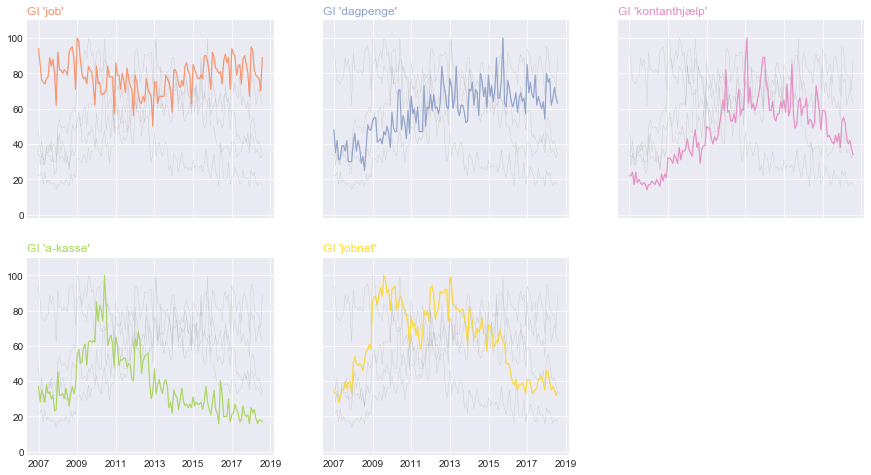

In [130]:
# libraries and data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Make a data frame
#df=pd.DataFrame({'x': range(1,11), 'y1': np.random.randn(10), 'y2': np.random.randn(10)+range(1,11), 'y3': np.random.randn(10)+range(11,21), 'y4': np.random.randn(10)+range(6,16), 'y5': np.random.randn(10)+range(4,14)+(0,0,0,0,0,0,0,-3,-8,-6), 'y6': np.random.randn(10)+range(2,12), 'y7': np.random.randn(10)+range(5,15), 'y8': np.random.randn(10)+range(4,14), 'y9': np.random.randn(10)+range(4,14) })
 
df2 = df2.assign(Date=pd.to_datetime(df2[['Year', 'Month']].assign(day=1)))
df = df2.drop(columns = ['Year', 'Month'])

# Initialize the figure
f = plt.figure(figsize=(15,8))
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set2')
 
# multiple line plot
num=0
for column in df.drop('Date', axis=1):
    num+=1
 
    # Find the right spot on the plot
    plt.subplot(2,3, num)
 
    # plot every groups, but discreet
    for v in df.drop('Date', axis=1):
        plt.plot(df['Date'], df[v], marker='', color='grey', linewidth=0.4, alpha=0.3)
 
    # Plot the lineplot
    
    plt.plot(df['Date'], df[column], marker='', color=palette(num),  \
             linewidth=1.2, alpha=0.9, label=column)
 
    # Same limits for everybody!
    #plt.xlim(0,10)
    plt.ylim(-2,110)

    #Not ticks everywhere
    if num in range(4):
        plt.tick_params(labelbottom=False, direction = 'out')
    if num not in [1,4]:
        plt.tick_params(labelleft=False)
 
    # Add title
    plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num) )
 
# general title
#plt.suptitle("GI performance for 5 job-related keywords (2007-2018)", fontsize=13, fontweight=0, color='black', style='italic', y=1.0)
 
# Axis title
#plt.text(0.5, 0.02, 'Time', ha='center', va='center')
#plt.text(0.06, 0.5, 'Note', ha='center', va='center', rotation='vertical')

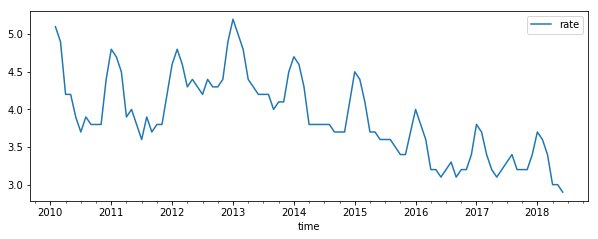

In [4]:
###-------------User input start----------------###
# Number of lags for explanatory variables
n_lags = 1
# Should be set to 1 for seasonally adjusted unemployment data and 0 otherwise
season_adjustment = 0
# Specify type of unemployment - 'ILO-unemp', 'Net unemp' or 'Gross unemp'
unemp_type = 'Net unemp'
# Number of months from 2007-01 to cut
cut_n_months = 36
###--------------User input end-----------------###

# Importing unemployment data from statbank.dk
AKUurl = 'https://api.statbank.dk/v1/data/AKU125/CSV?lang=en&valuePresentation=Value&timeOrder=Descending&delimiter=Semicolon&allowVariablesInHead=true&S%C3%86SON=11&S%C3%86SON=10&BESKSTATUS=LPCT&TID=*'
AKUcsv = pd.read_csv(AKUurl, sep = ";")
unemp_url = 'https://api.statbank.dk/v1/data/AUS07/CSV?lang=en&valuePresentation=Value&timeOrder=Descending&delimiter=Semicolon&allowVariablesInHead=true&YD=TOT&YD=NET&TID=*&SAESONFAK=9&SAESONFAK=22'
raw_unemp = pd.read_csv(unemp_url, sep = ";")

# Reshaping and constructing dummies for filtering
AKUcsv['season_adj'] = np.where(AKUcsv['SÆSON'] == 'Non-seasonally adjusted', 0, 1)
AKUcsv.columns = ['todrop', 'type', 'time', 'rate', 'season_adj']
AKUcsv['type'] = AKUcsv['type'].str.replace(r'rate', r'')
AKU = AKUcsv.drop('todrop', axis=1)
raw_unemp['season_adj'] = np.where(raw_unemp['SAESONFAK'] == 'Seasonally adjusted figures in percent of the labour force', 1, 0)
raw_unemp.columns = ['type', 'time', 'SAESONFAK', 'rate', 'season_adj']
unemp = raw_unemp.drop('SAESONFAK', axis=1)

# Merge data 
df_all = pd.concat([AKU, unemp], ignore_index=True)
#print(df_all.head())

# Convert variable time to date format and sort by date
df_all['time'] = df_all['time'].str.replace(r'\D', r' ')
df_all['time'] = pd.to_datetime(df_all['time'], format = "%Y %m" )
df_all = df_all.sort_values('time')

# Shortening of type names
df_all['type'] = df_all['type'].str.replace(r'unemployment', r'unemp')
df_all['type'] = df_all['type'].str.strip()
#print(df_all)

# Creating df that contains data for relevant type of unemployment.
unemp_rates = df_all[(df_all['season_adj']==season_adjustment) & (df_all['type']==unemp_type)].drop(columns='season_adj')
unemp_rates = unemp_rates.reset_index(drop=True)

# Copying unemployment rates for creating first difference variable later
unemp_rates_first_diff = unemp_rates.copy()

# Create varaible lagged unemplyment rate
df2['unemp_lag1'] = unemp_rates['rate'].shift(n_lags)

# Create variables for lagged average GIs
df3 = df2.copy()
df3['Average_GI_job_lag1'] = df3['Average_GI_job'].shift(n_lags)
df3['Average_GI_dagpenge_lag1'] = df3['Average_GI_dagpenge'].shift(n_lags)
df3['Average_GI_kontanthjælp_lag1'] = df3['Average_GI_kontanthjælp'].shift(n_lags)
df3['Average_GI_akasse_lag1'] = df3['Average_GI_akasse'].shift(n_lags)
df3['Average_GI_jobnet_lag1'] = df3['Average_GI_jobnet'].shift(n_lags)

# Removing first observation in both dataframes, sinces df3 now contains NA i first row
# Additionally ensuring that d4 and unemp_rates have the same number of columns
df4 = df3[(n_lags+cut_n_months):len(unemp_rates)]
unemp_rates = unemp_rates[(n_lags+cut_n_months):]


# Construction X and y
X = np.array(df4[['Average_GI_job_lag1',
                  'Average_GI_dagpenge_lag1',
                  'Average_GI_kontanthjælp_lag1', 
                  'Average_GI_akasse',
                  'Average_GI_jobnet',
                  'unemp_lag1'
                 ]]) # creating ndarray of X values (2 variables)
X_ar = np.array(df4[['unemp_lag1']]) # creating ndarray of X values (2 variables)
y = np.array(unemp_rates[['rate']])


# Security check to ensure that length of variable lists match.
if (len(X)-len(y)!=0):
    print('-------------------------------------------------------------------')
    print('----WARNING: Number of observations in X and y does not match!!----')
    print('---------------Length of y: ' + str(len(y)) + '. Length of X: ' + str(len(X)) + '------------------')
    print('-------------------------------------------------------------------')
unemp_rates.plot(x='time', y='rate', figsize=(10,3.5))

# Constructing first diff y
unemp_rates_first_diff['unemp_rate_fd'] = unemp_rates_first_diff['rate']-unemp_rates_first_diff['rate'].shift(1)
unemp_rates_first_diff = unemp_rates_first_diff[1+cut_n_months:]
y_fd = np.array(unemp_rates_first_diff[['unemp_rate_fd']])

#------Old data import--------#
## Read unemployment data from csv
#unemp_rates = pd.read_excel('Bruttoledige4.xlsx')
#print(unemp_rates[0:5])
#unemp_rates['Year'] =  [x[0:4] for x in unemp_rates['Date']]
#unemp_rates['Month'] =  [x[5:] for x in unemp_rates['Date']]


In [5]:
# Split into continous time series
###----------------User input start------------------###
train_share = 0.5
valuation_share = 0.3
test_share = 0.2
# Specify X - should be either 'X' og 'X_ar' (autoregressive).
X_type = X_ar
# Specify y - should be either y or y_fd (first diff)
y = y
###-----------------User input end-------------------###

dev_share = train_share + valuation_share



# Constructing samples split
X_dev_ts = X_type[:int(len(X_type)*dev_share)]
X_train_ts = X_type[:int(len(X_type)*train_share)]
X_val_ts = X_type[int(len(X_type)*train_share):int(len(X_type)*dev_share)]
X_test_ts = X_type[int(len(X_type)*dev_share):] 

if (len(X_train_ts)+len(X_val_ts)+len(X_test_ts))!= len(X_type):
    print('--------WARNING LENGTHS DO NOT MATCH!!-----------')
else:
    print('len(X_dev_ts): ' + str(len(X_dev_ts)))
    print('len(X_train_ts): ' + str(len(X_train_ts)))
    print('len(X_val_ts): ' + str(len(X_val_ts)))
    print('len(X_test_ts): ' + str(len(X_test_ts)))

y_dev_ts = y[:int(len(y)*dev_share)]    
y_train_ts = y[:int(len(y)*train_share)]
y_val_ts = y[int(len(y)*train_share):int(len(y)*(dev_share))]
y_test_ts = y[int(len(y)*dev_share):] 

if (len(y_train_ts)+len(y_val_ts)+len(y_test_ts))!= len(y):
    print('--------WARNING LENGTHS DO NOT MATCH!!-----------')
else:
    print('len(y_dev_ts): ' + str(len(y_dev_ts)))
    print('len(y_train_ts): ' + str(len(y_train_ts)))
    print('len(y_val_ts): ' + str(len(y_val_ts)))
    print('len(y_test_ts): ' + str(len(y_test_ts)))



len(X_dev_ts): 80
len(X_train_ts): 50
len(X_val_ts): 30
len(X_test_ts): 21
len(y_dev_ts): 80
len(y_train_ts): 50
len(y_val_ts): 30
len(y_test_ts): 21


C:\Users\owood\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\owood\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\owood\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\owood\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

test_mse_df
          0
0  0.040731
1  0.038442
2  0.038392
3  0.038362
4  0.038363
5  0.038471
6  0.038749
7  0.039244
8  0.039742
9  0.040161
            y_test    y_pred
Year_month                  
2016-10-01     3.2  3.086127
2016-11-01     3.2  3.203974
2016-12-01     3.4  3.203974
2017-01-01     3.8  3.428907
2017-02-01     3.7  3.833710
2017-03-01     3.4  3.738199
2017-04-01     3.2  3.428907
2017-05-01     3.1  3.203974
2017-06-01     3.2  3.086127
2017-07-01     3.3  3.203974
2017-08-01     3.4  3.318269
2017-09-01     3.2  3.428907
2017-10-01     3.2  3.203974
2017-11-01     3.2  3.203974
2017-12-01     3.4  3.203974
2018-01-01     3.7  3.428907
2018-02-01     3.6  3.738199
2018-03-01     3.4  3.638907
2018-04-01     3.0  3.428907
2018-05-01     3.0  2.964853
2018-06-01     2.9  2.964853


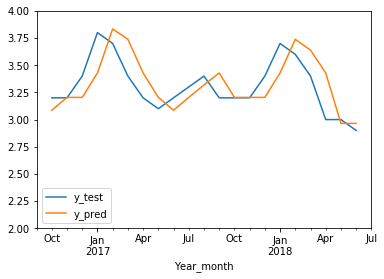

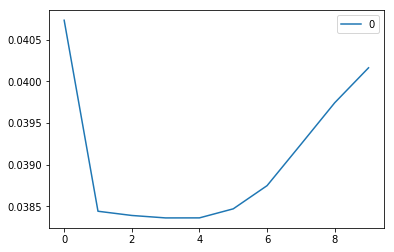

In [6]:
# ------Lasso/Ridge------- #

###---------------User input start-----------------###
# Specify which model to use - either 'Lasso' or linear_model.Ridge
use_model = Lasso
# Specify polynomial degree to allow
n_degree = 6
###----------------User input end------------------###
test_mse_list = [] 
for n_degree in range(1,11):
    perform = []
    lambdas = np.logspace(-4, 4, 33)
    for lambda_ in lambdas:
        pipe_lasso = make_pipeline(PolynomialFeatures(degree=n_degree), 
                                   StandardScaler(),
                                   use_model(alpha=lambda_, random_state=1))
        pipe_lasso.fit(X_train_ts, y_train_ts)
        y_pred_ts = pipe_lasso.predict(X_val_ts) # Transformation?
        perform.append(mse(y_pred_ts, y_val_ts))

    hyperparam_perform = pd.Series(perform,index=lambdas)

    optimal = hyperparam_perform.nsmallest(1)    
    #print(optimal) # optimal lambda

    # using optimal lambda in new pipe
    pipe_lasso = make_pipeline(PolynomialFeatures(degree=n_degree), # dont use poly features for OLS
                               StandardScaler(),
                               use_model(alpha=optimal.index[0]))

    pipe_lasso.fit(X_dev_ts,y_dev_ts) # Fitting model to development data set using new pipe
    #print('n_degree:' + str(n_degree))
    #print('Test mse:', round(mse(pipe_lasso.predict(X_test_ts),y_test_ts), 3))
    #print('Train mse:', round(mse(pipe_lasso.predict(X_train_ts),y_train_ts), 3))
    test_mse_list.append(mse(pipe_lasso.predict(X_test_ts),y_test_ts))

print('test_mse_df')
#print(test_mse_list)
test_mse_df = pd.DataFrame(test_mse_list)
print(test_mse_df)

y_pred_ts = pipe_lasso.predict(X_test_ts)
df_y_test_ts = pd.DataFrame(y_test_ts)
df_y_pred_ts = pd.DataFrame(y_pred_ts)

df_ts = pd.DataFrame()
df_ts['y_test'] = df_y_test_ts[0]
df_ts['y_pred'] = df_y_pred_ts[0]
df_ts['Year_month'] = np.array(unemp_rates['time'][int(len(y)*dev_share):])
df_ts.set_index('Year_month', inplace=True)
#print(len(df_ts))

print(df_ts)
#df_ts.reset_index(drop=True)
#df_ts.reset_index(level=0, inplace=True)
#axes = plt.gca()
df_ts.plot(ylim = [2,4])
#set_ylim(0, 100)
test_mse_df.plot()


OLS 0.0371
    y_test    y_pred
0      3.2  3.075713
1      3.2  3.174930
2      3.4  3.174930
3      3.8  3.373363
4      3.7  3.770229
5      3.4  3.671013
6      3.2  3.373363
7      3.1  3.174930
8      3.2  3.075713
9      3.3  3.174930
10     3.4  3.274147
11     3.2  3.373363
12     3.2  3.174930
13     3.2  3.174930
14     3.4  3.174930
15     3.7  3.373363
16     3.6  3.671013
17     3.4  3.571796
18     3.0  3.373363
19     3.0  2.976497
20     2.9  2.976497


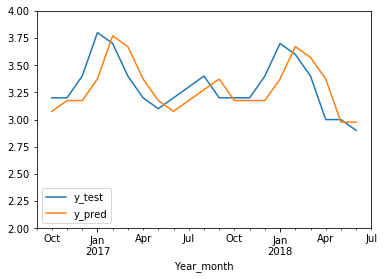

In [7]:
#--------OLS----------#
#print(X_dev_ts)

model = sm.OLS(y_dev_ts, X_dev_ts).fit()
predictions = model.predict(X_test_ts)
model.summary()
print('OLS', round(mse(predictions,y_test_ts), 4))


X_dev_ts_p = PolynomialFeatures(degree=1).fit_transform(X_dev_ts)
X_test_ts_p = PolynomialFeatures(degree=1).fit_transform(X_test_ts)

reg = LinearRegression().fit(X_dev_ts_p, y_dev_ts)
mse(reg.predict(X_test_ts_p),y_test_ts)
pred2 = reg.predict(X_test_ts_p)



df_y_test_OLS = pd.DataFrame(y_test_ts)
df_y_pred_OLS = pd.DataFrame(predictions)
df_OLS = pd.DataFrame()
df_OLS['y_test'] = df_y_test_OLS[0]
df_OLS['y_pred'] = df_y_pred_OLS[0]
print(df_OLS)
df_OLS['Year_month'] = np.array(unemp_rates['time'][int(len(y)*dev_share):])
df_OLS.set_index('Year_month', inplace=True)

df_OLS.plot(ylim = [2,4])

